In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


2024-04-03 00:15:06.870482: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 00:15:06.873237: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 00:15:06.971647: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 00:15:07.356920: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 00:15:08.378007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


2024-04-03 00:15:09.607209: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 00:15:09.608369: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-04-03 00:15:11.892292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:12.423711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:13.936688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:14.166074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


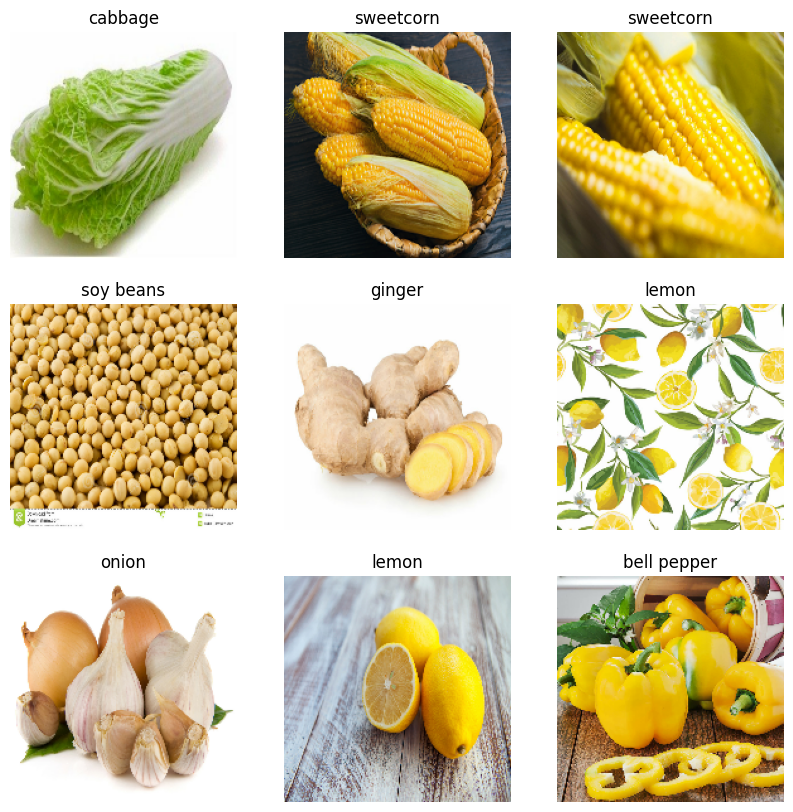

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-04-03 00:15:19.072638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:19.597996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:21.242532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 432ms/step - accuracy: 0.0327 - loss: 7.0732

2024-04-03 00:15:23.070414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.0342 - loss: 7.0489

2024-04-03 00:15:23.720662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.0341 - loss: 6.7795

2024-04-03 00:15:25.090698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 48s 551ms/step - accuracy: 0.0338 - loss: 6.6718

2024-04-03 00:15:26.461393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 35s 468ms/step - accuracy: 0.0312 - loss: 5.7273

2024-04-03 00:15:31.070615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:31.442404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 30s 455ms/step - accuracy: 0.0303 - loss: 5.3721

2024-04-03 00:15:34.713377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:15:34.870625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 27s 449ms/step - accuracy: 0.0303 - loss: 5.1511

2024-04-03 00:15:37.613139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - accuracy: 0.0306 - loss: 5.0979

2024-04-03 00:15:38.439141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 25s 444ms/step - accuracy: 0.0308 - loss: 5.0727

2024-04-03 00:15:38.765769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - accuracy: 0.0316 - loss: 4.9385

2024-04-03 00:15:41.285350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 442ms/step - accuracy: 0.0321 - loss: 4.8805

2024-04-03 00:15:42.776198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 431ms/step - accuracy: 0.0328 - loss: 4.7941

2024-04-03 00:15:44.144254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.0333 - loss: 4.7474

2024-04-03 00:15:45.063020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - accuracy: 0.0341 - loss: 4.6767

2024-04-03 00:15:47.032205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.0347 - loss: 4.6254

2024-04-03 00:15:48.643539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.0364 - loss: 4.5336 

2024-04-03 00:15:51.581686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.0387 - loss: 4.4527

2024-04-03 00:15:54.507301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.0394 - loss: 4.4338

2024-04-03 00:15:55.665531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.0443 - loss: 4.3160

2024-04-03 00:16:01.056367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:01.933983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 433ms/step - accuracy: 0.0446 - loss: 4.3085 - val_accuracy: 0.3191 - val_loss: 2.6202
Epoch 2/25


2024-04-03 00:16:05.157453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:05.665453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:05 4s/step - accuracy: 0.1875 - loss: 3.1811

2024-04-03 00:16:07.182863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - accuracy: 0.1905 - loss: 3.0054

2024-04-03 00:16:08.804933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 38s 415ms/step - accuracy: 0.1961 - loss: 2.9866

2024-04-03 00:16:09.406841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 37s 423ms/step - accuracy: 0.2020 - loss: 2.9500

2024-04-03 00:16:10.633278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 498ms/step - accuracy: 0.2037 - loss: 2.9398

2024-04-03 00:16:11.837110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 30s 406ms/step - accuracy: 0.2134 - loss: 2.8749

2024-04-03 00:16:15.567468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:15.929771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 27s 411ms/step - accuracy: 0.2166 - loss: 2.8520

2024-04-03 00:16:19.202333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:19.359981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.2225 - loss: 2.8272

2024-04-03 00:16:22.005920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 0.2233 - loss: 2.8237

2024-04-03 00:16:22.835077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.2241 - loss: 2.8203

2024-04-03 00:16:23.184332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.2285 - loss: 2.8010

2024-04-03 00:16:25.690444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.2306 - loss: 2.7916

2024-04-03 00:16:27.165466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 405ms/step - accuracy: 0.2340 - loss: 2.7777

2024-04-03 00:16:28.559910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 399ms/step - accuracy: 0.2358 - loss: 2.7698

2024-04-03 00:16:29.466190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - accuracy: 0.2386 - loss: 2.7572

2024-04-03 00:16:31.459946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.2404 - loss: 2.7478

2024-04-03 00:16:33.091774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.2440 - loss: 2.7305

2024-04-03 00:16:35.979971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.2478 - loss: 2.7134

2024-04-03 00:16:38.786683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.2488 - loss: 2.7090

2024-04-03 00:16:39.839552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.2563 - loss: 2.6779

2024-04-03 00:16:45.101572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:46.057186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 418ms/step - accuracy: 0.2568 - loss: 2.6757 - val_accuracy: 0.6638 - val_loss: 1.4093
Epoch 3/25


2024-04-03 00:16:49.708624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:16:50.181362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:45 4s/step - accuracy: 0.6250 - loss: 1.5726

2024-04-03 00:16:51.786809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 431ms/step - accuracy: 0.5109 - loss: 1.7880

2024-04-03 00:16:53.568268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 39s 431ms/step - accuracy: 0.4935 - loss: 1.8135

2024-04-03 00:16:54.177962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 39s 442ms/step - accuracy: 0.4672 - loss: 1.8501

2024-04-03 00:16:55.436203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 46s 527ms/step - accuracy: 0.4617 - loss: 1.8616

2024-04-03 00:16:56.725867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 34s 442ms/step - accuracy: 0.4444 - loss: 1.9294

2024-04-03 00:17:00.873845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.4445 - loss: 1.9310

2024-04-03 00:17:01.307588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 440ms/step - accuracy: 0.4466 - loss: 1.9362

2024-04-03 00:17:04.747949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:17:04.880642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 26s 438ms/step - accuracy: 0.4495 - loss: 1.9296

2024-04-03 00:17:07.654310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 25s 436ms/step - accuracy: 0.4506 - loss: 1.9262

2024-04-03 00:17:08.512121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.4511 - loss: 1.9247

2024-04-03 00:17:08.823815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 22s 437ms/step - accuracy: 0.4535 - loss: 1.9174

2024-04-03 00:17:11.467140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.4545 - loss: 1.9144

2024-04-03 00:17:13.111751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 428ms/step - accuracy: 0.4558 - loss: 1.9102

2024-04-03 00:17:14.489542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 17s 423ms/step - accuracy: 0.4568 - loss: 1.9069

2024-04-03 00:17:15.489532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - accuracy: 0.4586 - loss: 1.9004

2024-04-03 00:17:17.617877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 14s 426ms/step - accuracy: 0.4598 - loss: 1.8962

2024-04-03 00:17:19.280293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.4629 - loss: 1.8825

2024-04-03 00:17:22.373439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.4657 - loss: 1.8696

2024-04-03 00:17:25.263631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.4665 - loss: 1.8662

2024-04-03 00:17:26.425344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.4725 - loss: 1.8429

2024-04-03 00:17:32.090384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:17:33.020679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 440ms/step - accuracy: 0.4729 - loss: 1.8412 - val_accuracy: 0.7949 - val_loss: 0.8473
Epoch 4/25


2024-04-03 00:17:36.610696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:17:37.094190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:35 4s/step - accuracy: 0.7188 - loss: 1.2961

2024-04-03 00:17:38.636609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.6631 - loss: 1.2855

2024-04-03 00:17:40.360588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - accuracy: 0.6576 - loss: 1.2878

2024-04-03 00:17:41.045780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - accuracy: 0.6434 - loss: 1.3177

2024-04-03 00:17:42.366787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 46s 525ms/step - accuracy: 0.6394 - loss: 1.3266

2024-04-03 00:17:43.487239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 33s 429ms/step - accuracy: 0.6311 - loss: 1.3374

2024-04-03 00:17:47.444753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 32s 426ms/step - accuracy: 0.6307 - loss: 1.3380

2024-04-03 00:17:47.788300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 429ms/step - accuracy: 0.6311 - loss: 1.3295

2024-04-03 00:17:51.216037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:17:51.367697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.6361 - loss: 1.3140

2024-04-03 00:17:54.223263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.6369 - loss: 1.3113

2024-04-03 00:17:55.053932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.6377 - loss: 1.3088

2024-04-03 00:17:55.393943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.6413 - loss: 1.2945

2024-04-03 00:17:58.033810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.6429 - loss: 1.2883

2024-04-03 00:17:59.516658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 423ms/step - accuracy: 0.6456 - loss: 1.2785

2024-04-03 00:18:00.952659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 17s 417ms/step - accuracy: 0.6472 - loss: 1.2725

2024-04-03 00:18:01.929957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 416ms/step - accuracy: 0.6497 - loss: 1.2633

2024-04-03 00:18:04.122818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.6517 - loss: 1.2561

2024-04-03 00:18:05.941471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.6555 - loss: 1.2416

2024-04-03 00:18:09.100115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.6591 - loss: 1.2273

2024-04-03 00:18:12.012082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 413ms/step - accuracy: 0.6600 - loss: 1.2238

2024-04-03 00:18:13.168316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6662 - loss: 1.1987

2024-04-03 00:18:21.957469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:18:23.572401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 487ms/step - accuracy: 0.6667 - loss: 1.1969 - val_accuracy: 0.8889 - val_loss: 0.4962
Epoch 5/25


2024-04-03 00:18:28.400934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:18:29.001873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:11 5s/step - accuracy: 0.7500 - loss: 0.8704

2024-04-03 00:18:30.966719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 55s 592ms/step - accuracy: 0.7780 - loss: 0.8144

2024-04-03 00:18:33.306192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 53s 582ms/step - accuracy: 0.7803 - loss: 0.8114

2024-04-03 00:18:34.152780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 53s 598ms/step - accuracy: 0.7829 - loss: 0.8011

2024-04-03 00:18:35.714659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 59s 678ms/step - accuracy: 0.7839 - loss: 0.7964

2024-04-03 00:18:37.225929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 41s 538ms/step - accuracy: 0.7946 - loss: 0.7504

2024-04-03 00:18:41.953683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 40s 528ms/step - accuracy: 0.7953 - loss: 0.7480

2024-04-03 00:18:42.408510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 35s 516ms/step - accuracy: 0.8000 - loss: 0.7300

2024-04-03 00:18:46.114948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 34s 511ms/step - accuracy: 0.8005 - loss: 0.7278

2024-04-03 00:18:46.319980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 29s 496ms/step - accuracy: 0.8039 - loss: 0.7132

2024-04-03 00:18:49.250565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 29s 502ms/step - accuracy: 0.8043 - loss: 0.7114

2024-04-03 00:18:50.132261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 28s 497ms/step - accuracy: 0.8046 - loss: 0.7098

2024-04-03 00:18:50.477044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 0.8060 - loss: 0.7026

2024-04-03 00:18:53.233317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 24s 491ms/step - accuracy: 0.8065 - loss: 0.6998

2024-04-03 00:18:54.755728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 21s 478ms/step - accuracy: 0.8074 - loss: 0.6955

2024-04-03 00:18:56.205881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.8079 - loss: 0.6936

2024-04-03 00:18:57.214240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 16s 463ms/step - accuracy: 0.8088 - loss: 0.6914

2024-04-03 00:18:59.270969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 14s 464ms/step - accuracy: 0.8094 - loss: 0.6899

2024-04-03 00:19:01.020657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - accuracy: 0.8104 - loss: 0.6874

2024-04-03 00:19:04.162807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.8113 - loss: 0.6845

2024-04-03 00:19:07.123883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.8115 - loss: 0.6836

2024-04-03 00:19:08.295774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.8133 - loss: 0.6758

2024-04-03 00:19:13.866356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:19:14.778943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 467ms/step - accuracy: 0.8134 - loss: 0.6751 - val_accuracy: 0.9031 - val_loss: 0.5039
Epoch 6/25


2024-04-03 00:19:18.244830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:19:18.753069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:32 4s/step - accuracy: 0.8125 - loss: 0.5793

2024-04-03 00:19:20.273415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 39s 418ms/step - accuracy: 0.8379 - loss: 0.5889

2024-04-03 00:19:22.054195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 42s 460ms/step - accuracy: 0.8463 - loss: 0.5686

2024-04-03 00:19:22.792176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 42s 479ms/step - accuracy: 0.8562 - loss: 0.5492

2024-04-03 00:19:24.167686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 48s 546ms/step - accuracy: 0.8571 - loss: 0.5482

2024-04-03 00:19:25.402409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 43s 566ms/step - accuracy: 0.8629 - loss: 0.5275

2024-04-03 00:19:32.041132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 43s 572ms/step - accuracy: 0.8632 - loss: 0.5252

2024-04-03 00:19:32.717355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 40s 593ms/step - accuracy: 0.8650 - loss: 0.5123

2024-04-03 00:19:37.690525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:19:37.856954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 34s 581ms/step - accuracy: 0.8676 - loss: 0.4998

2024-04-03 00:19:41.698150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 34s 587ms/step - accuracy: 0.8680 - loss: 0.4983

2024-04-03 00:19:42.735931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 33s 583ms/step - accuracy: 0.8683 - loss: 0.4968

2024-04-03 00:19:43.161369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 30s 582ms/step - accuracy: 0.8698 - loss: 0.4890

2024-04-03 00:19:46.459487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.8704 - loss: 0.4855

2024-04-03 00:19:48.292928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - accuracy: 0.8713 - loss: 0.4812

2024-04-03 00:19:49.996084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 23s 555ms/step - accuracy: 0.8717 - loss: 0.4799

2024-04-03 00:19:51.124418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 542ms/step - accuracy: 0.8725 - loss: 0.4769

2024-04-03 00:19:53.477286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 17s 539ms/step - accuracy: 0.8733 - loss: 0.4744

2024-04-03 00:19:55.296612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 12s 527ms/step - accuracy: 0.8746 - loss: 0.4696

2024-04-03 00:19:58.850801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 514ms/step - accuracy: 0.8761 - loss: 0.4643

2024-04-03 00:20:01.963559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 514ms/step - accuracy: 0.8765 - loss: 0.4629

2024-04-03 00:20:03.198822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8790 - loss: 0.4525

2024-04-03 00:20:08.827943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:20:09.813985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 526ms/step - accuracy: 0.8792 - loss: 0.4518 - val_accuracy: 0.9316 - val_loss: 0.3900
Epoch 7/25


2024-04-03 00:20:13.439223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:20:13.960133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:47 4s/step - accuracy: 0.7812 - loss: 0.9964

2024-04-03 00:20:15.508629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 39s 430ms/step - accuracy: 0.8476 - loss: 0.6219

2024-04-03 00:20:17.331719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - accuracy: 0.8565 - loss: 0.5869

2024-04-03 00:20:17.928280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 39s 448ms/step - accuracy: 0.8701 - loss: 0.5295

2024-04-03 00:20:19.236158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 46s 532ms/step - accuracy: 0.8724 - loss: 0.5169

2024-04-03 00:20:20.492292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 34s 443ms/step - accuracy: 0.8875 - loss: 0.4484

2024-04-03 00:20:24.713369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - accuracy: 0.8885 - loss: 0.4448

2024-04-03 00:20:25.549543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 37s 559ms/step - accuracy: 0.8934 - loss: 0.4224

2024-04-03 00:20:32.033179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:20:32.259987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 35s 583ms/step - accuracy: 0.8962 - loss: 0.4095

2024-04-03 00:20:36.805179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 34s 591ms/step - accuracy: 0.8968 - loss: 0.4061

2024-04-03 00:20:38.110087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 34s 587ms/step - accuracy: 0.8971 - loss: 0.4044

2024-04-03 00:20:38.594096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 30s 594ms/step - accuracy: 0.8991 - loss: 0.3947

2024-04-03 00:20:42.200762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 590ms/step - accuracy: 0.9002 - loss: 0.3900

2024-04-03 00:20:44.203260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 578ms/step - accuracy: 0.9019 - loss: 0.3849

2024-04-03 00:20:46.132953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 23s 570ms/step - accuracy: 0.9030 - loss: 0.3819

2024-04-03 00:20:47.414912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 20s 565ms/step - accuracy: 0.9044 - loss: 0.3776

2024-04-03 00:20:50.062001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 18s 567ms/step - accuracy: 0.9055 - loss: 0.3747

2024-04-03 00:20:52.333413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 554ms/step - accuracy: 0.9074 - loss: 0.3687

2024-04-03 00:20:56.044877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 539ms/step - accuracy: 0.9092 - loss: 0.3626

2024-04-03 00:20:59.243288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 538ms/step - accuracy: 0.9097 - loss: 0.3611

2024-04-03 00:21:00.487231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9124 - loss: 0.3513

2024-04-03 00:21:06.387971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:21:07.339700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 548ms/step - accuracy: 0.9126 - loss: 0.3506 - val_accuracy: 0.9459 - val_loss: 0.4111
Epoch 8/25


2024-04-03 00:21:10.673772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:21:11.173499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:29 4s/step - accuracy: 0.8438 - loss: 0.2565

2024-04-03 00:21:12.790928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.9055 - loss: 0.2149

2024-04-03 00:21:14.442723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 39s 429ms/step - accuracy: 0.9100 - loss: 0.2123

2024-04-03 00:21:15.071336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 39s 447ms/step - accuracy: 0.9187 - loss: 0.2252

2024-04-03 00:21:16.417186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 47s 542ms/step - accuracy: 0.9212 - loss: 0.2272

2024-04-03 00:21:17.753055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 33s 440ms/step - accuracy: 0.9358 - loss: 0.2312

2024-04-03 00:21:21.743292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - accuracy: 0.9366 - loss: 0.2315

2024-04-03 00:21:22.142922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 32s 482ms/step - accuracy: 0.9413 - loss: 0.2291

2024-04-03 00:21:26.897341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:21:27.115647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 32s 537ms/step - accuracy: 0.9434 - loss: 0.2287

2024-04-03 00:21:32.261986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 32s 548ms/step - accuracy: 0.9438 - loss: 0.2289

2024-04-03 00:21:33.674600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 31s 546ms/step - accuracy: 0.9439 - loss: 0.2289

2024-04-03 00:21:34.137267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 29s 559ms/step - accuracy: 0.9449 - loss: 0.2282

2024-04-03 00:21:37.912148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9452 - loss: 0.2284

2024-04-03 00:21:39.829764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 24s 550ms/step - accuracy: 0.9455 - loss: 0.2293

2024-04-03 00:21:41.814621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.9456 - loss: 0.2302

2024-04-03 00:21:43.111598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 539ms/step - accuracy: 0.9458 - loss: 0.2314

2024-04-03 00:21:45.730843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 17s 540ms/step - accuracy: 0.9459 - loss: 0.2320

2024-04-03 00:21:47.765000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - accuracy: 0.9460 - loss: 0.2331

2024-04-03 00:21:51.464216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step - accuracy: 0.9460 - loss: 0.2337

2024-04-03 00:21:54.711599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 518ms/step - accuracy: 0.9460 - loss: 0.2338

2024-04-03 00:21:56.039843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9463 - loss: 0.2330

2024-04-03 00:22:02.131836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:22:03.068080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 533ms/step - accuracy: 0.9464 - loss: 0.2329 - val_accuracy: 0.9544 - val_loss: 0.4138
Epoch 9/25


2024-04-03 00:22:06.588286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:22:07.077892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:46 4s/step - accuracy: 0.9688 - loss: 0.0857

2024-04-03 00:22:08.667580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.9600 - loss: 0.2551

2024-04-03 00:22:10.428939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - accuracy: 0.9606 - loss: 0.2498

2024-04-03 00:22:11.127127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - accuracy: 0.9582 - loss: 0.2533

2024-04-03 00:22:12.411335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 46s 530ms/step - accuracy: 0.9580 - loss: 0.2509

2024-04-03 00:22:13.593864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.9563 - loss: 0.2360

2024-04-03 00:22:18.552830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 36s 487ms/step - accuracy: 0.9564 - loss: 0.2360

2024-04-03 00:22:19.289660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 39s 574ms/step - accuracy: 0.9576 - loss: 0.2352

2024-04-03 00:22:25.532619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:22:25.736500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 36s 590ms/step - accuracy: 0.9585 - loss: 0.2307

2024-04-03 00:22:30.137251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 35s 594ms/step - accuracy: 0.9587 - loss: 0.2290

2024-04-03 00:22:31.341536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 34s 589ms/step - accuracy: 0.9588 - loss: 0.2281

2024-04-03 00:22:31.816474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 30s 595ms/step - accuracy: 0.9594 - loss: 0.2226

2024-04-03 00:22:35.361215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 591ms/step - accuracy: 0.9598 - loss: 0.2198

2024-04-03 00:22:37.297813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 576ms/step - accuracy: 0.9603 - loss: 0.2151

2024-04-03 00:22:39.130873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 23s 567ms/step - accuracy: 0.9606 - loss: 0.2127

2024-04-03 00:22:40.303306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 20s 560ms/step - accuracy: 0.9610 - loss: 0.2109

2024-04-03 00:22:42.950300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 17s 557ms/step - accuracy: 0.9613 - loss: 0.2095

2024-04-03 00:22:44.808128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 546ms/step - accuracy: 0.9619 - loss: 0.2066

2024-04-03 00:22:48.497344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - accuracy: 0.9623 - loss: 0.2037

2024-04-03 00:22:51.901760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step - accuracy: 0.9624 - loss: 0.2031

2024-04-03 00:22:53.160782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9628 - loss: 0.1991

2024-04-03 00:22:58.915568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:22:59.833840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 543ms/step - accuracy: 0.9628 - loss: 0.1989 - val_accuracy: 0.9516 - val_loss: 0.3727
Epoch 10/25


2024-04-03 00:23:03.340272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:23:03.836084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:35 4s/step - accuracy: 0.9688 - loss: 0.0981

2024-04-03 00:23:05.460172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 430ms/step - accuracy: 0.9527 - loss: 0.2085

2024-04-03 00:23:07.220847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 42s 459ms/step - accuracy: 0.9536 - loss: 0.2084

2024-04-03 00:23:07.918135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 40s 456ms/step - accuracy: 0.9565 - loss: 0.2128

2024-04-03 00:23:09.160096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 47s 535ms/step - accuracy: 0.9574 - loss: 0.2141

2024-04-03 00:23:10.402784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 38s 498ms/step - accuracy: 0.9657 - loss: 0.1939

2024-04-03 00:23:15.800325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 38s 507ms/step - accuracy: 0.9659 - loss: 0.1930

2024-04-03 00:23:16.503180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 38s 562ms/step - accuracy: 0.9678 - loss: 0.1852

2024-04-03 00:23:21.963203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 37s 560ms/step - accuracy: 0.9680 - loss: 0.1844

2024-04-03 00:23:22.176946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 35s 577ms/step - accuracy: 0.9687 - loss: 0.1798

2024-04-03 00:23:26.439101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 34s 578ms/step - accuracy: 0.9688 - loss: 0.1784

2024-04-03 00:23:27.501130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 33s 574ms/step - accuracy: 0.9688 - loss: 0.1778

2024-04-03 00:23:27.938819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 30s 579ms/step - accuracy: 0.9688 - loss: 0.1744

2024-04-03 00:23:31.453094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - accuracy: 0.9688 - loss: 0.1726

2024-04-03 00:23:33.374043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 25s 568ms/step - accuracy: 0.9690 - loss: 0.1705

2024-04-03 00:23:35.164872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 22s 553ms/step - accuracy: 0.9692 - loss: 0.1692

2024-04-03 00:23:36.419463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step - accuracy: 0.9695 - loss: 0.1676

2024-04-03 00:23:38.810087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 17s 543ms/step - accuracy: 0.9698 - loss: 0.1663

2024-04-03 00:23:40.699769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.9700 - loss: 0.1646

2024-04-03 00:23:44.100983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 517ms/step - accuracy: 0.9703 - loss: 0.1627

2024-04-03 00:23:47.353093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.9704 - loss: 0.1622

2024-04-03 00:23:48.589063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9708 - loss: 0.1590

2024-04-03 00:23:54.298454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:23:55.280271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 530ms/step - accuracy: 0.9708 - loss: 0.1588 - val_accuracy: 0.9487 - val_loss: 0.4157
Epoch 11/25


2024-04-03 00:23:58.894028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:23:59.422692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:54 4s/step - accuracy: 0.9688 - loss: 0.0946

2024-04-03 00:24:01.080840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 39s 421ms/step - accuracy: 0.9656 - loss: 0.2236

2024-04-03 00:24:02.856516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 39s 434ms/step - accuracy: 0.9653 - loss: 0.2279

2024-04-03 00:24:03.467932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 40s 459ms/step - accuracy: 0.9655 - loss: 0.2247

2024-04-03 00:24:04.764069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 49s 560ms/step - accuracy: 0.9661 - loss: 0.2207

2024-04-03 00:24:06.298964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 47s 618ms/step - accuracy: 0.9659 - loss: 0.2187

2024-04-03 00:24:13.867568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 46s 617ms/step - accuracy: 0.9658 - loss: 0.2185

2024-04-03 00:24:14.612434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 45s 666ms/step - accuracy: 0.9660 - loss: 0.2139

2024-04-03 00:24:20.596373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 44s 659ms/step - accuracy: 0.9661 - loss: 0.2130

2024-04-03 00:24:20.807557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 40s 662ms/step - accuracy: 0.9668 - loss: 0.2090

2024-04-03 00:24:25.032167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 38s 661ms/step - accuracy: 0.9670 - loss: 0.2078

2024-04-03 00:24:26.319110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 37s 653ms/step - accuracy: 0.9672 - loss: 0.2072

2024-04-03 00:24:26.733622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 33s 647ms/step - accuracy: 0.9679 - loss: 0.2025

2024-04-03 00:24:30.182286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 31s 643ms/step - accuracy: 0.9682 - loss: 0.2002

2024-04-03 00:24:32.277719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 27s 625ms/step - accuracy: 0.9687 - loss: 0.1971

2024-04-03 00:24:34.166663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 25s 614ms/step - accuracy: 0.9690 - loss: 0.1958

2024-04-03 00:24:35.395100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 21s 602ms/step - accuracy: 0.9693 - loss: 0.1936

2024-04-03 00:24:37.927082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - accuracy: 0.9697 - loss: 0.1918

2024-04-03 00:24:39.794828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 578ms/step - accuracy: 0.9701 - loss: 0.1884

2024-04-03 00:24:43.317848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.9705 - loss: 0.1850

2024-04-03 00:24:46.524683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 559ms/step - accuracy: 0.9706 - loss: 0.1842

2024-04-03 00:24:47.767159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.9711 - loss: 0.1789

2024-04-03 00:24:53.831320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:24:54.893387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 572ms/step - accuracy: 0.9712 - loss: 0.1786 - val_accuracy: 0.9601 - val_loss: 0.3716
Epoch 12/25


2024-04-03 00:24:58.742037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:24:59.260067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:25:00.911619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 40s 433ms/step - accuracy: 0.9849 - loss: 0.0816

2024-04-03 00:25:02.758403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.9822 - loss: 0.0874

2024-04-03 00:25:03.427703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 39s 436ms/step - accuracy: 0.9793 - loss: 0.0991

2024-04-03 00:25:04.800629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 52s 597ms/step - accuracy: 0.9772 - loss: 0.1168

2024-04-03 00:25:06.485292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 58s 762ms/step - accuracy: 0.9713 - loss: 0.1418

2024-04-03 00:25:16.502702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 59s 785ms/step - accuracy: 0.9711 - loss: 0.1432

2024-04-03 00:25:18.007394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 55s 811ms/step - accuracy: 0.9696 - loss: 0.1514

2024-04-03 00:25:24.711077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:25:24.993122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 52s 840ms/step - accuracy: 0.9694 - loss: 0.1533

2024-04-03 00:25:30.187298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 49s 824ms/step - accuracy: 0.9693 - loss: 0.1542

2024-04-03 00:25:32.029969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 48s 820ms/step - accuracy: 0.9693 - loss: 0.1543

2024-04-03 00:25:32.582148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 42s 794ms/step - accuracy: 0.9696 - loss: 0.1539

2024-04-03 00:25:36.960075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 38s 794ms/step - accuracy: 0.9698 - loss: 0.1529

2024-04-03 00:25:39.570786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 35s 786ms/step - accuracy: 0.9701 - loss: 0.1519

2024-04-03 00:25:42.054985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 30s 756ms/step - accuracy: 0.9703 - loss: 0.1513

2024-04-03 00:25:43.350856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 26s 729ms/step - accuracy: 0.9706 - loss: 0.1509

2024-04-03 00:25:45.613479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 22s 714ms/step - accuracy: 0.9708 - loss: 0.1503

2024-04-03 00:25:47.434508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 678ms/step - accuracy: 0.9713 - loss: 0.1488

2024-04-03 00:25:50.597456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.9718 - loss: 0.1468

2024-04-03 00:25:53.869681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 9s 647ms/step - accuracy: 0.9719 - loss: 0.1463

2024-04-03 00:25:55.017288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.9727 - loss: 0.1423

2024-04-03 00:26:03.721527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:26:05.517761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 706ms/step - accuracy: 0.9727 - loss: 0.1420 - val_accuracy: 0.9601 - val_loss: 0.3221
Epoch 13/25


2024-04-03 00:26:12.926105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:26:13.544215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:26:15.508695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 55s 594ms/step - accuracy: 0.9532 - loss: 0.1625

2024-04-03 00:26:18.090773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 54s 593ms/step - accuracy: 0.9541 - loss: 0.1635

2024-04-03 00:26:18.910934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 55s 623ms/step - accuracy: 0.9585 - loss: 0.1547

2024-04-03 00:26:20.595125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 739ms/step - accuracy: 0.9595 - loss: 0.1516

2024-04-03 00:26:22.413650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 43s 566ms/step - accuracy: 0.9675 - loss: 0.1528

2024-04-03 00:26:27.264453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 42s 557ms/step - accuracy: 0.9680 - loss: 0.1518

2024-04-03 00:26:27.743334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 37s 547ms/step - accuracy: 0.9709 - loss: 0.1464

2024-04-03 00:26:31.736879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:26:31.872537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 31s 519ms/step - accuracy: 0.9728 - loss: 0.1434

2024-04-03 00:26:34.858437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 31s 526ms/step - accuracy: 0.9729 - loss: 0.1434

2024-04-03 00:26:35.748224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 30s 519ms/step - accuracy: 0.9731 - loss: 0.1433

2024-04-03 00:26:36.098335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 26s 513ms/step - accuracy: 0.9738 - loss: 0.1419

2024-04-03 00:26:38.707539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 24s 506ms/step - accuracy: 0.9741 - loss: 0.1408

2024-04-03 00:26:40.227008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 21s 492ms/step - accuracy: 0.9746 - loss: 0.1395

2024-04-03 00:26:41.674511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 19s 482ms/step - accuracy: 0.9748 - loss: 0.1390

2024-04-03 00:26:42.623749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - accuracy: 0.9751 - loss: 0.1380

2024-04-03 00:26:44.721200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 0.9753 - loss: 0.1374

2024-04-03 00:26:46.378046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step - accuracy: 0.9757 - loss: 0.1353

2024-04-03 00:26:50.743006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 8s 517ms/step - accuracy: 0.9760 - loss: 0.1333

2024-04-03 00:26:57.586872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step - accuracy: 0.9761 - loss: 0.1325

2024-04-03 00:27:00.262211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9768 - loss: 0.1288

2024-04-03 00:27:11.943806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:27:13.570635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 680ms/step - accuracy: 0.9768 - loss: 0.1286 - val_accuracy: 0.9601 - val_loss: 0.3731
Epoch 14/25


2024-04-03 00:27:24.276860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:27:24.776345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:24 5s/step - accuracy: 0.9688 - loss: 0.0451

2024-04-03 00:27:26.868519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 44s 481ms/step - accuracy: 0.9808 - loss: 0.0584

2024-04-03 00:27:28.859940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 44s 481ms/step - accuracy: 0.9823 - loss: 0.0578

2024-04-03 00:27:29.476885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.9835 - loss: 0.0759

2024-04-03 00:27:30.717203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 47s 544ms/step - accuracy: 0.9830 - loss: 0.0880

2024-04-03 00:27:31.895283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - accuracy: 0.9797 - loss: 0.1355

2024-04-03 00:27:35.768025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:27:36.143123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 28s 425ms/step - accuracy: 0.9795 - loss: 0.1409

2024-04-03 00:27:39.350428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:27:39.501327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 413ms/step - accuracy: 0.9797 - loss: 0.1409

2024-04-03 00:27:42.130197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 420ms/step - accuracy: 0.9798 - loss: 0.1409

2024-04-03 00:27:42.942093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.9798 - loss: 0.1408

2024-04-03 00:27:43.251574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 419ms/step - accuracy: 0.9800 - loss: 0.1399

2024-04-03 00:27:45.698828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.9800 - loss: 0.1394

2024-04-03 00:27:47.112428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 409ms/step - accuracy: 0.9801 - loss: 0.1381

2024-04-03 00:27:48.452245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step - accuracy: 0.9801 - loss: 0.1379

2024-04-03 00:27:49.317180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - accuracy: 0.9802 - loss: 0.1376

2024-04-03 00:27:51.207840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.9802 - loss: 0.1372

2024-04-03 00:27:52.803246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.9803 - loss: 0.1358

2024-04-03 00:27:55.617216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.9803 - loss: 0.1341

2024-04-03 00:27:59.793732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.9803 - loss: 0.1337

2024-04-03 00:28:01.648450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.9804 - loss: 0.1307

2024-04-03 00:28:09.603993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:28:10.858211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 475ms/step - accuracy: 0.9805 - loss: 0.1305 - val_accuracy: 0.9601 - val_loss: 0.3318
Epoch 15/25


2024-04-03 00:28:15.150252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:28:15.677723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 7:12 4s/step - accuracy: 0.9688 - loss: 0.0886

2024-04-03 00:28:17.421717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 47s 512ms/step - accuracy: 0.9780 - loss: 0.1266

2024-04-03 00:28:19.456391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 47s 518ms/step - accuracy: 0.9791 - loss: 0.1242

2024-04-03 00:28:20.166233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 45s 511ms/step - accuracy: 0.9805 - loss: 0.1155

2024-04-03 00:28:21.565291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 51s 583ms/step - accuracy: 0.9802 - loss: 0.1197

2024-04-03 00:28:22.819996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 36s 472ms/step - accuracy: 0.9791 - loss: 0.1361

2024-04-03 00:28:27.031718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 35s 465ms/step - accuracy: 0.9791 - loss: 0.1365

2024-04-03 00:28:27.454981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 31s 464ms/step - accuracy: 0.9792 - loss: 0.1389

2024-04-03 00:28:31.015212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:28:31.139747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 27s 454ms/step - accuracy: 0.9791 - loss: 0.1380

2024-04-03 00:28:33.824875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 26s 452ms/step - accuracy: 0.9791 - loss: 0.1377

2024-04-03 00:28:34.708725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 25s 448ms/step - accuracy: 0.9791 - loss: 0.1376

2024-04-03 00:28:35.008645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.9791 - loss: 0.1367

2024-04-03 00:28:37.550726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.9792 - loss: 0.1358

2024-04-03 00:28:38.958117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 0.9794 - loss: 0.1340

2024-04-03 00:28:40.248984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.9795 - loss: 0.1333

2024-04-03 00:28:41.121910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - accuracy: 0.9797 - loss: 0.1317

2024-04-03 00:28:43.059656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.9799 - loss: 0.1303

2024-04-03 00:28:44.589634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - accuracy: 0.9803 - loss: 0.1284 

2024-04-03 00:28:47.339970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.9805 - loss: 0.1265

2024-04-03 00:28:50.019066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.9805 - loss: 0.1260

2024-04-03 00:28:51.131736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.9808 - loss: 0.1230

2024-04-03 00:28:59.146108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:29:00.455690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 466ms/step - accuracy: 0.9808 - loss: 0.1229 - val_accuracy: 0.9430 - val_loss: 0.3618
Epoch 16/25


2024-04-03 00:29:05.022731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:29:05.615521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:18 5s/step - accuracy: 1.0000 - loss: 0.0313

2024-04-03 00:29:07.781203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 54s 581ms/step - accuracy: 0.9584 - loss: 0.1481

2024-04-03 00:29:10.145854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 52s 576ms/step - accuracy: 0.9576 - loss: 0.1549

2024-04-03 00:29:10.856978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 49s 558ms/step - accuracy: 0.9590 - loss: 0.1543

2024-04-03 00:29:12.336815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 58s 664ms/step - accuracy: 0.9594 - loss: 0.1546

2024-04-03 00:29:13.886949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 40s 521ms/step - accuracy: 0.9662 - loss: 0.1404

2024-04-03 00:29:18.409847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 38s 513ms/step - accuracy: 0.9667 - loss: 0.1393

2024-04-03 00:29:18.814456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 33s 494ms/step - accuracy: 0.9695 - loss: 0.1325

2024-04-03 00:29:22.249144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:29:22.403162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 29s 477ms/step - accuracy: 0.9714 - loss: 0.1304

2024-04-03 00:29:25.001935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 27s 474ms/step - accuracy: 0.9718 - loss: 0.1298

2024-04-03 00:29:25.876938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 27s 469ms/step - accuracy: 0.9720 - loss: 0.1294

2024-04-03 00:29:26.159831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 24s 464ms/step - accuracy: 0.9732 - loss: 0.1267

2024-04-03 00:29:28.604012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 22s 458ms/step - accuracy: 0.9737 - loss: 0.1251

2024-04-03 00:29:29.958656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 19s 444ms/step - accuracy: 0.9746 - loss: 0.1225

2024-04-03 00:29:31.270479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 17s 436ms/step - accuracy: 0.9750 - loss: 0.1214

2024-04-03 00:29:32.128891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 15s 429ms/step - accuracy: 0.9756 - loss: 0.1197

2024-04-03 00:29:33.981729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 428ms/step - accuracy: 0.9761 - loss: 0.1184

2024-04-03 00:29:35.540461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.9767 - loss: 0.1163

2024-04-03 00:29:38.342674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.9772 - loss: 0.1141

2024-04-03 00:29:41.548360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.9773 - loss: 0.1136

2024-04-03 00:29:43.338378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9781 - loss: 0.1100

2024-04-03 00:29:50.678361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:29:51.795008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 473ms/step - accuracy: 0.9781 - loss: 0.1098 - val_accuracy: 0.9573 - val_loss: 0.3762
Epoch 17/25


2024-04-03 00:29:55.753520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:29:56.255724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:49 4s/step - accuracy: 1.0000 - loss: 0.0162

2024-04-03 00:29:57.890767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 45s 485ms/step - accuracy: 0.9791 - loss: 0.1822

2024-04-03 00:29:59.893194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 44s 488ms/step - accuracy: 0.9791 - loss: 0.1758

2024-04-03 00:30:00.540886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 42s 480ms/step - accuracy: 0.9796 - loss: 0.1575

2024-04-03 00:30:01.838686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 49s 564ms/step - accuracy: 0.9791 - loss: 0.1559

2024-04-03 00:30:03.148633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 34s 453ms/step - accuracy: 0.9799 - loss: 0.1286

2024-04-03 00:30:07.310082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:30:07.697682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 30s 449ms/step - accuracy: 0.9805 - loss: 0.1175

2024-04-03 00:30:11.058888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:30:11.202633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 26s 440ms/step - accuracy: 0.9812 - loss: 0.1112

2024-04-03 00:30:13.790216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 25s 437ms/step - accuracy: 0.9814 - loss: 0.1105

2024-04-03 00:30:14.604958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.9815 - loss: 0.1101

2024-04-03 00:30:14.904657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.9820 - loss: 0.1075

2024-04-03 00:30:17.276777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 0.9823 - loss: 0.1060

2024-04-03 00:30:18.653741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - accuracy: 0.9826 - loss: 0.1044

2024-04-03 00:30:19.958106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 411ms/step - accuracy: 0.9827 - loss: 0.1038

2024-04-03 00:30:20.848171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 405ms/step - accuracy: 0.9827 - loss: 0.1031

2024-04-03 00:30:22.727389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.9827 - loss: 0.1028

2024-04-03 00:30:24.285595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.9829 - loss: 0.1017

2024-04-03 00:30:28.864269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.9829 - loss: 0.1009

2024-04-03 00:30:32.975315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.9829 - loss: 0.1007

2024-04-03 00:30:34.477531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9830 - loss: 0.0988

2024-04-03 00:30:41.276353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:30:42.362094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 477ms/step - accuracy: 0.9830 - loss: 0.0986 - val_accuracy: 0.9544 - val_loss: 0.3372
Epoch 18/25


2024-04-03 00:30:46.258403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:30:46.735364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:32 4s/step - accuracy: 1.0000 - loss: 0.0358

2024-04-03 00:30:48.287275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 43s 471ms/step - accuracy: 0.9762 - loss: 0.1193

2024-04-03 00:30:50.099861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 43s 469ms/step - accuracy: 0.9767 - loss: 0.1192

2024-04-03 00:30:50.786712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 41s 470ms/step - accuracy: 0.9746 - loss: 0.1273

2024-04-03 00:30:52.096347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 47s 543ms/step - accuracy: 0.9737 - loss: 0.1292

2024-04-03 00:30:53.249960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 33s 436ms/step - accuracy: 0.9736 - loss: 0.1275

2024-04-03 00:30:57.196074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 32s 432ms/step - accuracy: 0.9739 - loss: 0.1261

2024-04-03 00:30:57.584601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 431ms/step - accuracy: 0.9757 - loss: 0.1203

2024-04-03 00:31:00.893706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:31:01.028252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 418ms/step - accuracy: 0.9764 - loss: 0.1185

2024-04-03 00:31:03.645719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 424ms/step - accuracy: 0.9765 - loss: 0.1181

2024-04-03 00:31:04.445054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 24s 420ms/step - accuracy: 0.9766 - loss: 0.1177

2024-04-03 00:31:04.756848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 0.9773 - loss: 0.1152

2024-04-03 00:31:07.187752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9776 - loss: 0.1140

2024-04-03 00:31:08.522331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 409ms/step - accuracy: 0.9779 - loss: 0.1123

2024-04-03 00:31:09.805754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step - accuracy: 0.9780 - loss: 0.1117

2024-04-03 00:31:10.652398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accuracy: 0.9780 - loss: 0.1109

2024-04-03 00:31:12.536945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 398ms/step - accuracy: 0.9780 - loss: 0.1104

2024-04-03 00:31:14.077625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.9781 - loss: 0.1095

2024-04-03 00:31:16.912301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.9782 - loss: 0.1084

2024-04-03 00:31:19.582573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.9782 - loss: 0.1082

2024-04-03 00:31:20.686933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9784 - loss: 0.1062

2024-04-03 00:31:25.879020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:31:26.792850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 411ms/step - accuracy: 0.9784 - loss: 0.1061 - val_accuracy: 0.9544 - val_loss: 0.3965
Epoch 19/25


2024-04-03 00:31:29.925269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:31:30.385093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:59 4s/step - accuracy: 1.0000 - loss: 0.0271

2024-04-03 00:31:31.907521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 37s 406ms/step - accuracy: 0.9959 - loss: 0.0368

2024-04-03 00:31:33.530770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 38s 416ms/step - accuracy: 0.9931 - loss: 0.0444

2024-04-03 00:31:34.124758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 37s 417ms/step - accuracy: 0.9846 - loss: 0.0678

2024-04-03 00:31:35.302501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 498ms/step - accuracy: 0.9830 - loss: 0.0726

2024-04-03 00:31:36.466813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 31s 404ms/step - accuracy: 0.9793 - loss: 0.0848

2024-04-03 00:31:40.108683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.9791 - loss: 0.0856

2024-04-03 00:31:40.458308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 27s 401ms/step - accuracy: 0.9785 - loss: 0.0883

2024-04-03 00:31:43.651340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:31:43.785515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 396ms/step - accuracy: 0.9790 - loss: 0.0867

2024-04-03 00:31:46.416465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 402ms/step - accuracy: 0.9791 - loss: 0.0864

2024-04-03 00:31:47.273552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 401ms/step - accuracy: 0.9792 - loss: 0.0860

2024-04-03 00:31:47.542302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.9800 - loss: 0.0834

2024-04-03 00:31:49.942097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 0.9802 - loss: 0.0825

2024-04-03 00:31:51.336939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 393ms/step - accuracy: 0.9806 - loss: 0.0812

2024-04-03 00:31:52.619417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 387ms/step - accuracy: 0.9808 - loss: 0.0804

2024-04-03 00:31:53.474098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 384ms/step - accuracy: 0.9810 - loss: 0.0796

2024-04-03 00:31:55.305011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.9812 - loss: 0.0792

2024-04-03 00:31:56.853813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.9814 - loss: 0.0786

2024-04-03 00:31:59.617955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.9816 - loss: 0.0783

2024-04-03 00:32:02.301742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.9816 - loss: 0.0782

2024-04-03 00:32:03.339084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9821 - loss: 0.0772

2024-04-03 00:32:08.538528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:32:09.382135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 401ms/step - accuracy: 0.9821 - loss: 0.0772 - val_accuracy: 0.9573 - val_loss: 0.3167
Epoch 20/25


2024-04-03 00:32:51.794599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:32:52.296697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:09:36 43s/step - accuracy: 1.0000 - loss: 0.0184

2024-04-03 00:32:53.797194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 35s 384ms/step - accuracy: 0.9910 - loss: 0.0706

2024-04-03 00:32:55.360227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 35s 389ms/step - accuracy: 0.9882 - loss: 0.0755

2024-04-03 00:32:55.934042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 0.9812 - loss: 0.0959

2024-04-03 00:32:57.078333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - accuracy: 0.9803 - loss: 0.0978

2024-04-03 00:32:58.206127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 29s 384ms/step - accuracy: 0.9787 - loss: 0.0934

2024-04-03 00:33:01.777854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:02.128687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 26s 393ms/step - accuracy: 0.9798 - loss: 0.0902

2024-04-03 00:33:05.339067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:05.478012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 388ms/step - accuracy: 0.9806 - loss: 0.0878

2024-04-03 00:33:08.076979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 395ms/step - accuracy: 0.9807 - loss: 0.0875

2024-04-03 00:33:08.861609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 22s 391ms/step - accuracy: 0.9808 - loss: 0.0871

2024-04-03 00:33:09.176520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.9813 - loss: 0.0853

2024-04-03 00:33:11.599584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 395ms/step - accuracy: 0.9814 - loss: 0.0846

2024-04-03 00:33:12.993325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 388ms/step - accuracy: 0.9816 - loss: 0.0842

2024-04-03 00:33:14.294393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 382ms/step - accuracy: 0.9816 - loss: 0.0840

2024-04-03 00:33:15.147390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 379ms/step - accuracy: 0.9817 - loss: 0.0835

2024-04-03 00:33:17.019259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.9818 - loss: 0.0830

2024-04-03 00:33:18.561782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.9820 - loss: 0.0819

2024-04-03 00:33:21.349083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.9821 - loss: 0.0810

2024-04-03 00:33:24.102149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.9821 - loss: 0.0808

2024-04-03 00:33:25.182660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9824 - loss: 0.0788

2024-04-03 00:33:30.403926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:31.268749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 400ms/step - accuracy: 0.9825 - loss: 0.0787 - val_accuracy: 0.9544 - val_loss: 0.3811
Epoch 21/25


2024-04-03 00:33:34.409469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:34.865593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:07 4s/step - accuracy: 1.0000 - loss: 0.0172

2024-04-03 00:33:36.413120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 37s 401ms/step - accuracy: 0.9939 - loss: 0.0200

2024-04-03 00:33:37.946138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 0.9923 - loss: 0.0228

2024-04-03 00:33:38.542027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 36s 412ms/step - accuracy: 0.9879 - loss: 0.0364

2024-04-03 00:33:39.711463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - accuracy: 0.9869 - loss: 0.0397

2024-04-03 00:33:40.794241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - accuracy: 0.9810 - loss: 0.0627

2024-04-03 00:33:44.406765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:44.793195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 26s 396ms/step - accuracy: 0.9804 - loss: 0.0696

2024-04-03 00:33:48.006298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:33:48.147397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 0.9803 - loss: 0.0723

2024-04-03 00:33:50.778764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 397ms/step - accuracy: 0.9803 - loss: 0.0723

2024-04-03 00:33:51.572515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.9804 - loss: 0.0724

2024-04-03 00:33:51.849916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.9808 - loss: 0.0722

2024-04-03 00:33:54.232778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.9810 - loss: 0.0718

2024-04-03 00:33:55.633874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - accuracy: 0.9814 - loss: 0.0715

2024-04-03 00:33:56.908967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.9816 - loss: 0.0714

2024-04-03 00:33:57.747546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step - accuracy: 0.9817 - loss: 0.0717

2024-04-03 00:33:59.638595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.9819 - loss: 0.0719

2024-04-03 00:34:01.196932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.9822 - loss: 0.0720

2024-04-03 00:34:04.033087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.9825 - loss: 0.0716

2024-04-03 00:34:06.736962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.9826 - loss: 0.0715

2024-04-03 00:34:07.805752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9828 - loss: 0.0708

2024-04-03 00:34:13.012671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:34:13.903091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 401ms/step - accuracy: 0.9828 - loss: 0.0707 - val_accuracy: 0.9459 - val_loss: 0.3566
Epoch 22/25


2024-04-03 00:34:17.087115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:34:17.583172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:10 4s/step - accuracy: 1.0000 - loss: 0.0031

2024-04-03 00:34:19.107931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 37s 406ms/step - accuracy: 0.9895 - loss: 0.0643

2024-04-03 00:34:20.736380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 38s 414ms/step - accuracy: 0.9869 - loss: 0.0729

2024-04-03 00:34:21.315300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 37s 417ms/step - accuracy: 0.9830 - loss: 0.0822

2024-04-03 00:34:22.493879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 491ms/step - accuracy: 0.9825 - loss: 0.0834

2024-04-03 00:34:23.636298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.9804 - loss: 0.0868

2024-04-03 00:34:27.253137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 30s 396ms/step - accuracy: 0.9803 - loss: 0.0877

2024-04-03 00:34:27.612612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 27s 400ms/step - accuracy: 0.9806 - loss: 0.0891

2024-04-03 00:34:30.808999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:34:30.916436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 396ms/step - accuracy: 0.9816 - loss: 0.0863

2024-04-03 00:34:33.602256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 402ms/step - accuracy: 0.9818 - loss: 0.0858

2024-04-03 00:34:34.388643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 0.9819 - loss: 0.0854

2024-04-03 00:34:34.686667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.9825 - loss: 0.0832

2024-04-03 00:34:37.098902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.9828 - loss: 0.0819

2024-04-03 00:34:38.457105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 392ms/step - accuracy: 0.9832 - loss: 0.0803

2024-04-03 00:34:39.758856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 385ms/step - accuracy: 0.9835 - loss: 0.0795

2024-04-03 00:34:40.597577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 383ms/step - accuracy: 0.9838 - loss: 0.0781

2024-04-03 00:34:42.483400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.9839 - loss: 0.0772

2024-04-03 00:34:44.040378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.9841 - loss: 0.0760

2024-04-03 00:34:46.826275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.9842 - loss: 0.0749

2024-04-03 00:34:49.550892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.9843 - loss: 0.0746

2024-04-03 00:34:50.621050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9844 - loss: 0.0727

2024-04-03 00:34:55.874195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:34:56.781998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 403ms/step - accuracy: 0.9845 - loss: 0.0726 - val_accuracy: 0.9487 - val_loss: 0.4086
Epoch 23/25


2024-04-03 00:35:00.020723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:00.497055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:12 4s/step - accuracy: 0.9688 - loss: 0.1182

2024-04-03 00:35:02.036262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - accuracy: 0.9796 - loss: 0.1220

2024-04-03 00:35:03.613840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 36s 393ms/step - accuracy: 0.9804 - loss: 0.1203

2024-04-03 00:35:04.172210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 35s 401ms/step - accuracy: 0.9817 - loss: 0.1114

2024-04-03 00:35:05.332664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.9822 - loss: 0.1080

2024-04-03 00:35:06.408949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 29s 393ms/step - accuracy: 0.9850 - loss: 0.0837

2024-04-03 00:35:10.169811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:10.525678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - accuracy: 0.9849 - loss: 0.0837

2024-04-03 00:35:13.619268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:13.771853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 395ms/step - accuracy: 0.9849 - loss: 0.0829

2024-04-03 00:35:16.519038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 402ms/step - accuracy: 0.9848 - loss: 0.0827

2024-04-03 00:35:17.414999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 400ms/step - accuracy: 0.9849 - loss: 0.0825

2024-04-03 00:35:17.728146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 0.9850 - loss: 0.0809

2024-04-03 00:35:20.360790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.9850 - loss: 0.0802

2024-04-03 00:35:21.785768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 398ms/step - accuracy: 0.9851 - loss: 0.0790

2024-04-03 00:35:23.080228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 392ms/step - accuracy: 0.9852 - loss: 0.0783

2024-04-03 00:35:23.966999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 388ms/step - accuracy: 0.9852 - loss: 0.0773

2024-04-03 00:35:25.779450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.9851 - loss: 0.0768

2024-04-03 00:35:27.316634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.9851 - loss: 0.0757

2024-04-03 00:35:30.103755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.9850 - loss: 0.0751

2024-04-03 00:35:32.759305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.9850 - loss: 0.0750

2024-04-03 00:35:33.830669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9846 - loss: 0.0748

2024-04-03 00:35:39.022173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:39.920781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 405ms/step - accuracy: 0.9846 - loss: 0.0748 - val_accuracy: 0.9487 - val_loss: 0.4492
Epoch 24/25


2024-04-03 00:35:43.241441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:43.706242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:21 4s/step - accuracy: 0.9688 - loss: 0.1081

2024-04-03 00:35:45.312262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 38s 411ms/step - accuracy: 0.9708 - loss: 0.1012

2024-04-03 00:35:46.916329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 37s 410ms/step - accuracy: 0.9705 - loss: 0.1026

2024-04-03 00:35:47.509240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 37s 420ms/step - accuracy: 0.9716 - loss: 0.0985

2024-04-03 00:35:48.726464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 494ms/step - accuracy: 0.9719 - loss: 0.0993

2024-04-03 00:35:49.836263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - accuracy: 0.9721 - loss: 0.1040

2024-04-03 00:35:53.385361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:53.718453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 26s 394ms/step - accuracy: 0.9728 - loss: 0.1046

2024-04-03 00:35:56.843267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:35:56.996250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 24s 407ms/step - accuracy: 0.9732 - loss: 0.1058

2024-04-03 00:36:00.018114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 406ms/step - accuracy: 0.9733 - loss: 0.1057

2024-04-03 00:36:00.821081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 403ms/step - accuracy: 0.9734 - loss: 0.1055

2024-04-03 00:36:01.121202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.9741 - loss: 0.1039

2024-04-03 00:36:03.510190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.9745 - loss: 0.1029

2024-04-03 00:36:04.865947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 394ms/step - accuracy: 0.9751 - loss: 0.1010

2024-04-03 00:36:06.120820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.9754 - loss: 0.1000

2024-04-03 00:36:06.942016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - accuracy: 0.9757 - loss: 0.0991

2024-04-03 00:36:08.899707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.9758 - loss: 0.0986

2024-04-03 00:36:10.484319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.9760 - loss: 0.0974

2024-04-03 00:36:13.446188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.9763 - loss: 0.0959

2024-04-03 00:36:16.465982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.9764 - loss: 0.0955

2024-04-03 00:36:17.607547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9770 - loss: 0.0928

2024-04-03 00:36:22.995074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:36:23.934743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 413ms/step - accuracy: 0.9770 - loss: 0.0926 - val_accuracy: 0.9573 - val_loss: 0.3499
Epoch 25/25


2024-04-03 00:36:27.185830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:36:27.666741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:12 4s/step - accuracy: 1.0000 - loss: 0.0040

2024-04-03 00:36:29.208278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 39s 429ms/step - accuracy: 0.9853 - loss: 0.0812

2024-04-03 00:36:30.927900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 40s 435ms/step - accuracy: 0.9834 - loss: 0.0865

2024-04-03 00:36:31.499274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 37s 426ms/step - accuracy: 0.9816 - loss: 0.0916

2024-04-03 00:36:32.657507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 491ms/step - accuracy: 0.9809 - loss: 0.0950

2024-04-03 00:36:33.768994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 31s 404ms/step - accuracy: 0.9790 - loss: 0.1009

2024-04-03 00:36:37.523716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 30s 403ms/step - accuracy: 0.9789 - loss: 0.1008

2024-04-03 00:36:37.877973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 27s 408ms/step - accuracy: 0.9792 - loss: 0.0995

2024-04-03 00:36:41.151882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:36:41.312119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - accuracy: 0.9794 - loss: 0.0987

2024-04-03 00:36:43.917514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.9794 - loss: 0.0985

2024-04-03 00:36:44.710306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 403ms/step - accuracy: 0.9794 - loss: 0.0983

2024-04-03 00:36:45.013747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.9795 - loss: 0.0972

2024-04-03 00:36:47.407934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.9795 - loss: 0.0969

2024-04-03 00:36:48.781755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 396ms/step - accuracy: 0.9796 - loss: 0.0962

2024-04-03 00:36:50.117572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - accuracy: 0.9796 - loss: 0.0959

2024-04-03 00:36:50.972927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - accuracy: 0.9797 - loss: 0.0954

2024-04-03 00:36:53.011569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 391ms/step - accuracy: 0.9797 - loss: 0.0953

2024-04-03 00:36:54.570359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.9796 - loss: 0.0950

2024-04-03 00:36:57.288223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.9796 - loss: 0.0947

2024-04-03 00:36:59.920699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.9795 - loss: 0.0947

2024-04-03 00:37:00.949864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9795 - loss: 0.0942

2024-04-03 00:37:05.989120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-03 00:37:06.851141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 402ms/step - accuracy: 0.9795 - loss: 0.0941 - val_accuracy: 0.9487 - val_loss: 0.3420


Text(0.5, 1.0, 'Loss')

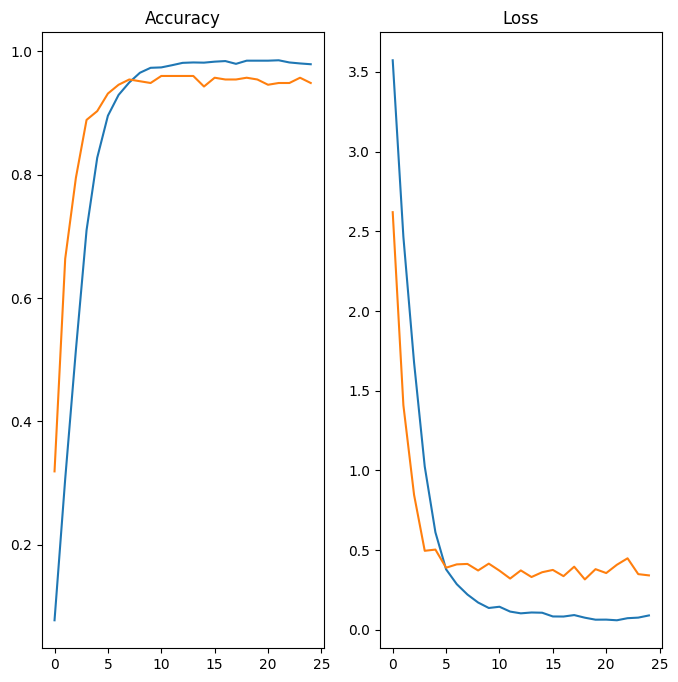

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 88.59


In [20]:
model.save('Image_classify.keras')